In [43]:
import json

result_nic = './predicted_captions_nic_4.json'
result_ssa = './predicted_captions_ssa_10.json'
result_scacnn = './predicted_captions_scacnn_10.json'


def load_captions(filepath):
    captions = {}
    cap_list = []
    with open(filepath, 'r') as fin:
        cap_list = json.load(fin)
    for cap in cap_list:
        captions[cap['image_id']] = cap['caption']
    return captions

caption_nic = load_captions(result_nic)
caption_ssa = load_captions(result_ssa)
caption_scacnn = load_captions(result_scacnn)
keys = list(caption_nic.keys())


loading annotations into memory...
Done (t=0.30s)
creating index...
index created!




Example: 1
Ground truth:
A shaggy dog lying on a green and blue blanket.
A black and gray dog lays on a green and blue plaid blanket.
A cat taking a nap on a colorful blanket.
A dog laying on a couch on a blanket.
A dog is sleeping on a couch with a plaid blanket.


NIC caption:  a cat laying on a bed with a dog on it .
SSA caption:  a cat laying on a bed with a stuffed animal .
SCA-CNN caption:  a dog is laying on a bed with a blanket .


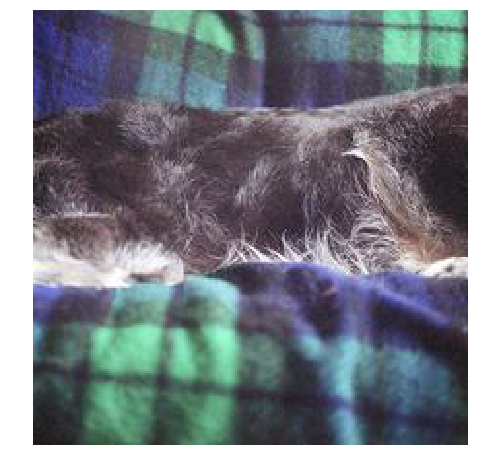


Example: 2
Ground truth:
A young boy throwing a frisbee in a grassy field
a young boy in the park throwing a frisbee
A young boy throws a frisbee in a tree lined park.
A kid in a city park throws a bright green Frisbee. 
A boy throwing a green frisbee in a grass field.


NIC caption:  a man in a field with a frisbee in the background .
SSA caption:  a man is holding a frisbee in the air .
SCA-CNN caption:  a baseball player is swinging at a ball


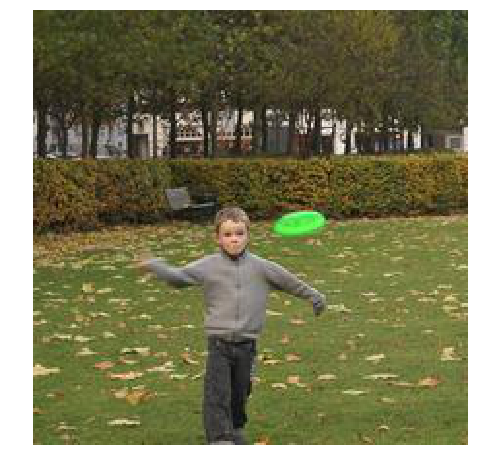


Example: 3
Ground truth:
A young woman in pink leggings playing tennis
A tennis player hits the tennis ball with her racket
A woman hitting a tennis ball with a tennis racquet.
A woman hits the tennis ball during a match.
a tennis player swinging a racket at a ball


NIC caption:  a woman is holding a tennis racket on a tennis court .
SSA caption:  a man holding a tennis racquet on a tennis court .
SCA-CNN caption:  a man is playing tennis on a tennis court .


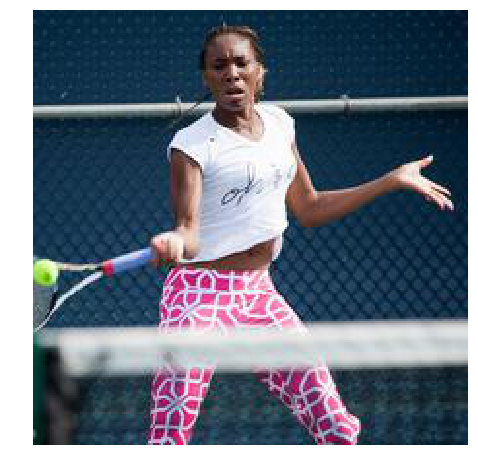


Example: 4
Ground truth:
A Nintendo Wii game console box sitting on a table.
The manufacturers box for the Nintendo wii on the floor
Box with picture of a hand holding a Nintendo wii remote.
A new WII game is still in the box.
This is a photo of a Wii video game console box. 


NIC caption:  a person is sitting on a table with a cup of scissors .
SSA caption:  a small white dog sitting on a chair .
SCA-CNN caption:  a man is holding a wii remote in his hand .


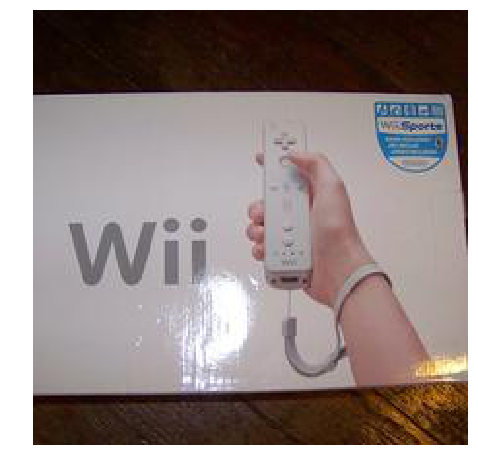


Example: 5
Ground truth:
A baseball player holding a bat during a game.
A pitcher about to throw a baseball on a baseball diamond.
Baseball players standing on a field with a crowd watching. 
A baseball game is in action at a baseball stadium.
Looking down at the field as the baseball is about to fly


NIC caption:  a baseball player is swinging a bat at a baseball game .
SSA caption:  a baseball player is swinging at a ball .
SCA-CNN caption:  a baseball player is swinging a bat at a ball


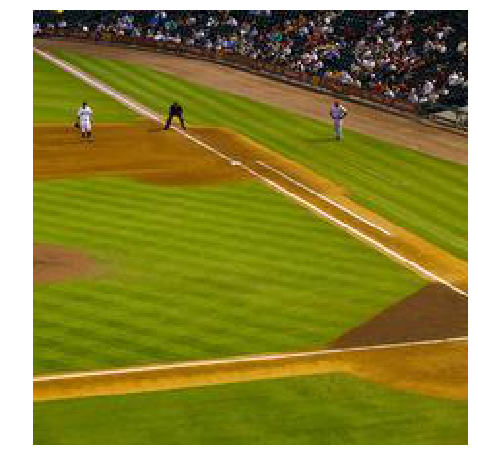

In [44]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
import glob
import sys
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

sys.path.append('../coco-caption')
from pycocotools.coco import COCO
annFile='./data/annotations/captions_val2014.json'
coco = COCO(annFile)
print('\n\n')

np.random.shuffle(keys)
samples = keys[:5]
cnt = 0
for img in samples:
    annIds = coco.getAnnIds(imgIds=img)
    anns = coco.loadAnns(annIds)
    cnt += 1
    print(f'\nExample: {cnt}')
    print('Ground truth:')
    coco.showAnns(anns)
    plt.figure()
    filepath = glob.glob(f'./data/val2014_resized/*{img}*')[0]
    I = io.imread(filepath)
    print('\n')
    print(f'NIC caption: {caption_nic[img]}')
    print(f'SSA caption: {caption_ssa[img]}')
    print(f'SCA-CNN caption: {caption_scacnn[img]}')
    plt.imshow(I)
    plt.axis('off')
    plt.show()
